In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import floor

__rows = 1
__cols = 1
def sb_init( rows, cols ):
    plt.figure( figsize=[ cols*5, rows*4])
    global __rows
    global __cols
    __rows = rows
    __cols = cols
    plt.subplot( rows, cols, 1 )
def sb( x, y):
    plt.subplot( __rows, __cols, x + ( y - 1 ) * __cols )

<ErrorbarContainer object of 3 artists>

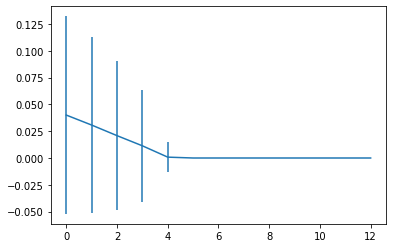

In [2]:
corr_func = np.loadtxt( "corr_func.txt" )
plt.errorbar( corr_func[:,0], corr_func[:,1], corr_func[:,2] )

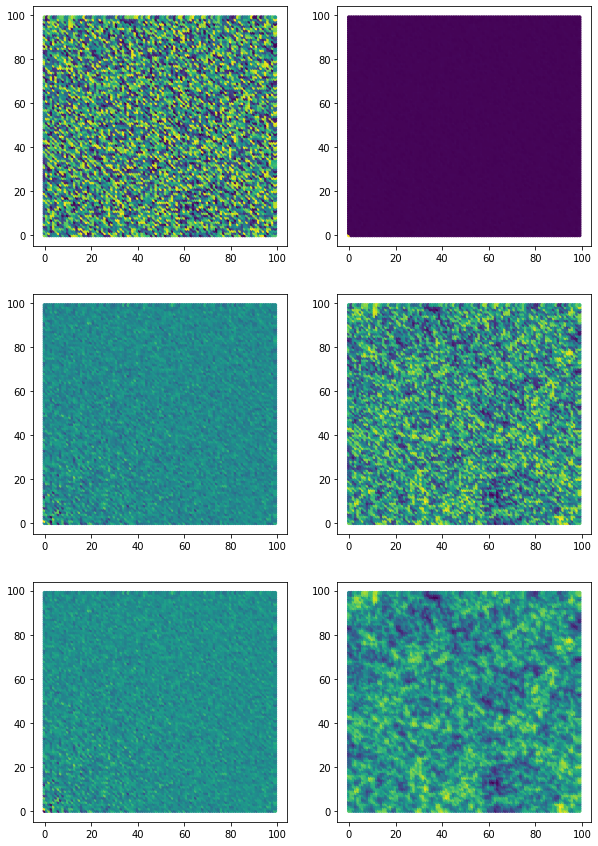

In [22]:
plt.figure(figsize=[10,15])
plt.subplot(3,2,1)
real = np.loadtxt( "real.txt" )
plt.scatter(real[:,0],real[:,1],marker='.',c=real[:,2])

plt.subplot(3,2,2)
fft = np.loadtxt( "fft.txt" )
plt.scatter(fft[:,0],fft[:,1],marker='.',c=fft[:,2])

plt.subplot(3,2,3)
fft2 = np.loadtxt( "fft2.txt" )
plt.scatter(fft2[:,0],fft2[:,1],marker='.',c=fft2[:,2])

plt.subplot(3,2,4)
real2 = np.loadtxt( "real2.txt" )
plt.scatter(real2[:,0],real2[:,1],marker='.',c=real2[:,2])

plt.subplot(3,2,5)
plt.scatter(fft2[:,0],fft2[:,1],marker='.',c=fft2[:,2] - fft[:,2])

plt.subplot(3,2,6)
plt.scatter(real2[:,0],real2[:,1],marker='.',c=real2[:,2] - real[:,2])


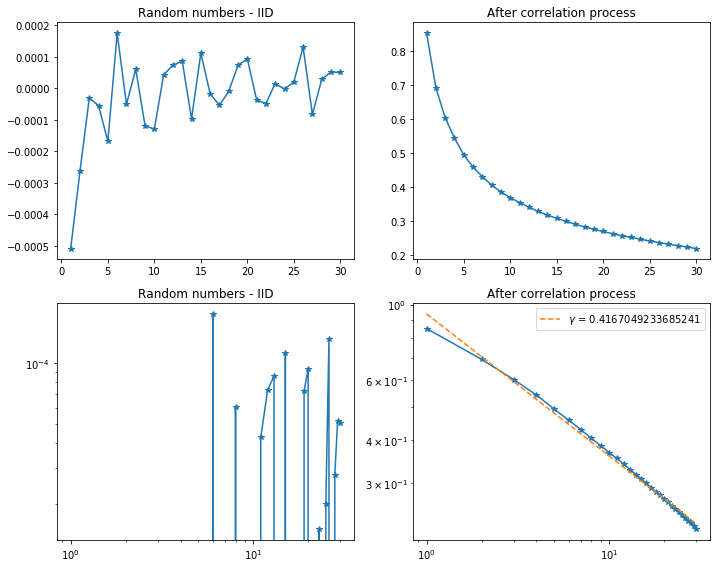

In [8]:
lims = [1, 30]
def line(x,m,q):
    return m*x+q
def exp(x,m,q):
    return np.exp( m * np.log(x) + q );

sb_init(2,3)

cf1 = np.loadtxt( "cf1.txt" )
cf1 = cf1[ np.logical_and( cf1[:,0] >= min(lims), cf1[:,0] <= max(lims) ), :]
cf1 = cf1[ cf1[:,0].argsort() ]
plt.plot( cf1[:,0], cf1[:,1], '-*')
plt.title("Random numbers - IID")

sb(1,2)
plt.loglog( cf1[:,0], cf1[:,1], '-*')
plt.title("Random numbers - IID")

sb(2,1)
cf2 = np.loadtxt( "cf2.txt" )
cf2 = cf2[ np.logical_and( cf2[:,0] >= min(lims), cf2[:,0] <= max(lims) ), :]
cf2 = cf2[ cf2[:,0].argsort() ]
plt.plot( cf2[:,0], cf2[:,1], '-*')
plt.title("After correlation process")

sb(2,2)
plt.loglog( cf2[:,0], cf2[:,1], '-*')

params, params_cv = curve_fit( line, np.log(cf2[:,0]), np.log(cf2[:,1]))
plt.loglog( cf2[:,0], exp( cf2[:,0], params[0], params[1] ), '--', label= r"$\gamma$ = " + str(-params[0]) )
plt.legend()

plt.title("After correlation process")

# sb(3,1)
# cfd = np.loadtxt( "cf_defects.txt" )
# cfd = cfd[ np.logical_and( cfd[:,0] >= min(lims), cfd[:,0] <= max(lims) ), :]
# cfd = cfd[ cfd[:,0].argsort() ]
# plt.plot( cfd[:,0], cfd[:,1], '-*')
# plt.title("Defects deposition")

# sb(3,2)
# plt.loglog( cfd[:,0], cfd[:,1], '-*')
# plt.title("Defects deposition")
# params, params_cv = curve_fit( line, np.log(cfd[:,0]), np.log(cfd[:,1]))
# plt.loglog( cfd[:,0], exp( cfd[:,0], params[0], params[1] ), '--', label= r"$\gamma$ = " + str(-params[0]) )
# plt.legend()


plt.tight_layout()

plt.savefig("CorrFunc_20211208_1x2000_0.4.pdf")

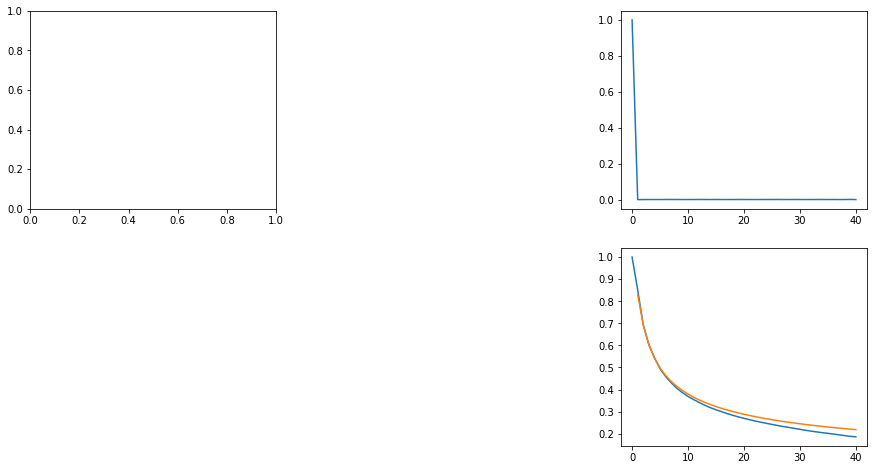

In [3]:
gamma = 0.4
sb_init(2,3)
# h1 = np.loadtxt( "h1.txt" )
# plt.scatter(h1[:,0],h1[:,1],marker='.',c=h1[:,2])

# sb(1,2)
# plt.hist( h1[:,2], bins=50 );

# sb(2,1)
# h2 = np.loadtxt( "h2.txt" )
# plt.scatter(h2[:,0],h2[:,1],marker='.',c=h2[:,2])

# sb(2,2)
# plt.hist( h2[:,2], bins=50 );

sb(3,1)
cf1 = np.loadtxt( "cf1.txt" )
plt.plot( cf1[:,0], cf1[:,1] )

sb(3,2)
cf2 = np.loadtxt( "cf2.txt" )
plt.plot( cf2[:,0], cf2[:,1] )
est = np.power( 1 + cf2[1:,0]*cf2[1:,0], - gamma / 2 )
est = est * cf2[2,1] / est[1] 
plt.plot( cf2[1:,0], est )


In [73]:
n = np.size( h2[:,0] )
h = np.zeros([ n*n,2] )
for i in range(0, n ):
    for j in range(0, n ):
        dx = abs( h2[i,0] - h2[j,0] )
        dy = abs( h2[i,1] - h2[j,1] )
        dx = min( dx, n - dx )
        dy = min( dy, n - dy )
        h[i + n*j, :] = [ np.sqrt( dx*dx + dy*dy ), h2[i,2] * h2[j,2] ]

In [74]:
maxn = floor( max( h[:,0] ) )
k = np.zeros( maxn )
for i in range(0,maxn):
    k[i] = np.average( h[ np.bitwise_and( h[:,0] >= i-0.5, h[:,0] < i+0.5 ), 1 ] )

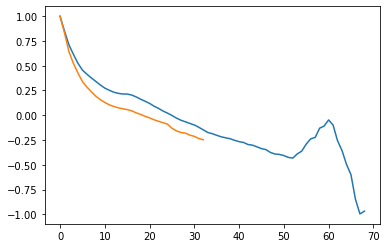

In [76]:
plt.plot( k )
plt.plot( cf2[:,0], cf2[:,1] )


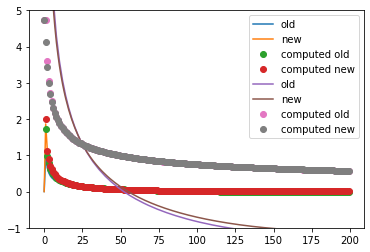

In [33]:
pst = np.loadtxt( "powerspectra_test.txt" )
gamma = 0.4

plt.plot( figsize = [50,50] )
pst[:,2] = pst[:,2] / pst[25,2] * pst[25,1]
pst[:,5] = pst[:,5] / pst[25,5] * pst[25,1]
pst[:,6] = pst[:,6] / pst[25,6] * pst[25,1]
plt.plot(pst[:,0], pst[:,1], '-', label='old')
plt.plot(pst[:,0], pst[:,2], '-', label='new')
plt.plot(pst[:,0], pst[:,5], 'o', label='computed old')
plt.plot(pst[:,0], pst[:,6], 'o', label='computed new')
plt.ylim([0,1])
plt.legend()

pst[:,4] = pst[:,4] / pst[25,4] * pst[25,3]
pst[:,7] = pst[:,7] / pst[25,7] * pst[25,3]
pst[:,8] = pst[:,8] / pst[25,8] * pst[25,3]
plt.plot(pst[:,0], pst[:,3], '-', label='old')
plt.plot(pst[:,0], pst[:,4], '-', label='new')
plt.plot(pst[:,0], pst[:,7], 'o', label='computed old')
plt.plot(pst[:,0], pst[:,8], 'o', label='computed new')
plt.plot()
plt.ylim([-1,5])
plt.legend()